<Axes: >

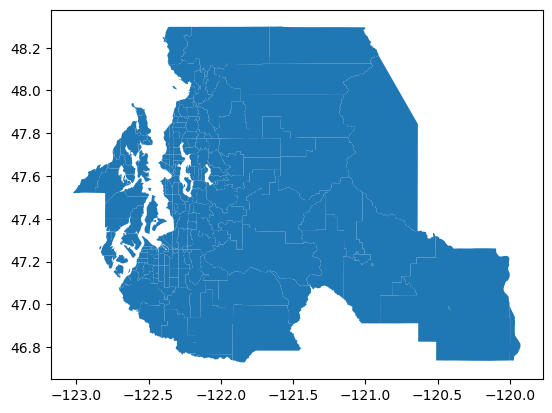

In [193]:
import geopandas as gp

gdf = gp.read_file('Zip_Codes.zip')
gdf.plot()

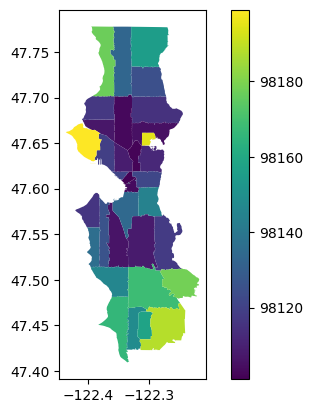

In [194]:

def read_zip_code_file(filename: str) -> list:
    out = []
    with open(filename, 'r') as f:
        for line in f:
            out.append(int(line.strip('\n')))
    return out

zip_code_filename = 'seattle_zip_codes.txt'
zip_codes = read_zip_code_file(zip_code_filename)
gdf['ZIP'].to_csv('temp.csv')
gdf = gdf[gdf['ZIP'].isin(zip_codes)]
gdf.plot('ZIP', legend=True)

gdf['ZIP'].to_csv('tempc2.csv')


In [195]:
import pandas as pd
import numpy as np

data_filename = "Seattle_Pet_Licenses.csv"
df = pd.read_csv(data_filename)
df_ratio = df.pivot_table(values='License Number', index='ZIP Code', columns='Species',
                          aggfunc=np.count_nonzero)
df_ratio = df_ratio.drop(labels=['Goat', 'Pig'], axis='columns')
df_ratio.fillna(1)
df_ratio['RATIO'] = df_ratio['Cat'] / df_ratio['Dog']
df_ratio['TOTAL'] = df_ratio['Cat'] + df_ratio['Dog']
df_ratio = df_ratio[df_ratio['TOTAL'] > 100]
df_ratio = df_ratio.sort_values(by='RATIO', ascending=False)

df_ratio.index = pd.to_numeric(df_ratio.index, downcast='integer')

print(df_ratio)

Species      Cat     Dog     RATIO   TOTAL
ZIP Code                                  
98104      186.0   241.0  0.771784   427.0
98121      306.0   468.0  0.653846   774.0
98102      525.0   865.0  0.606936  1390.0
98107      738.0  1233.0  0.598540  1971.0
98101      224.0   376.0  0.595745   600.0
98122      784.0  1364.0  0.574780  2148.0
98109      548.0  1012.0  0.541502  1560.0
98119      480.0   966.0  0.496894  1446.0
98133      449.0   922.0  0.486985  1371.0
98105      568.0  1184.0  0.479730  1752.0
98103     1184.0  2505.0  0.472655  3689.0
98125      750.0  1666.0  0.450180  2416.0
98115     1216.0  2814.0  0.432125  4030.0
98117      927.0  2171.0  0.426992  3098.0
98144      469.0  1191.0  0.393787  1660.0
98112      436.0  1119.0  0.389634  1555.0
98199      473.0  1293.0  0.365816  1766.0
98146      128.0   356.0  0.359551   484.0
98136      349.0   991.0  0.352170  1340.0
98116      483.0  1382.0  0.349493  1865.0
98106      365.0  1050.0  0.347619  1415.0
98178      

    OBJECTID    ZIP ZIPCODE COUNTY    SHAPE_Leng    SHAPE_Area  \
34        35  98101   98101    033  23619.028932  1.470012e+07   
35        36  98102   98102    033  37488.788166  4.322189e+07   
44        45  98112   98112    033  66321.069338  8.818645e+07   
45        46  98115   98115    033  77105.177543  1.813559e+08   
46        47  98116   98116    033  46123.021535  8.145976e+07   

                                             geometry     Cat     Dog  \
34  POLYGON ((-122.32785 47.61850, -122.32787 47.6...   224.0   376.0   
35  POLYGON ((-122.31232 47.64705, -122.31233 47.6...   525.0   865.0   
44  MULTIPOLYGON (((-122.30683 47.64729, -122.3068...   436.0  1119.0   
45  POLYGON ((-122.27294 47.70107, -122.27289 47.7...  1216.0  2814.0   
46  POLYGON ((-122.38139 47.59054, -122.38144 47.5...   483.0  1382.0   

       RATIO   TOTAL  
34  0.595745   600.0  
35  0.606936  1390.0  
44  0.389634  1555.0  
45  0.432125  4030.0  
46  0.349493  1865.0  
b=98104, a=98104
b=98121, 

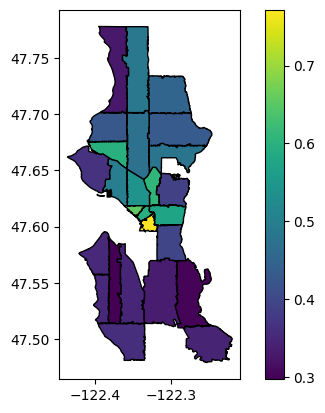

In [196]:
gdf = gdf.merge(df_ratio, how='left', left_on='ZIP', right_index=True)
print(gdf.head())

gdf.plot('RATIO', legend=True, edgecolor='black')

a = gdf['ZIP'].drop_duplicates().tolist()
b = df_ratio.index.tolist()

gdf['ZIP'].value_counts().to_csv('temp.csv')

for i in b:
    for j in a:
        if i == j:
            print(f'b={i}, a={j}')